<a href="https://colab.research.google.com/github/siddh-webd-ml/Machine-Learning/blob/main/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd0

In [26]:
df  = pd.read_csv("/content/placement.csv")

In [27]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


# HOW TO DETECT OUTLIERS??

1. Normal DIstribution/ Standard Normal ---> z score method/emperical  rule formula
2. skewness---> IQR/box plot method

In [28]:
import seaborn as sns

<ipython-input-29-bedb5a4c2603>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"])


<Axes: xlabel='cgpa', ylabel='Density'>

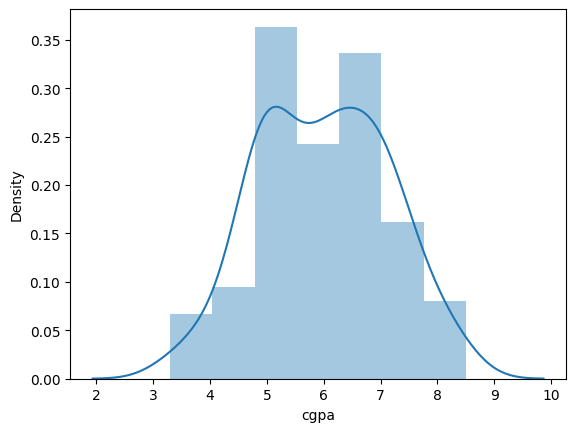

In [29]:
sns.distplot(df["cgpa"])

In [30]:
# finding the boundary:

lower_fence = df["cgpa"].mean()-3*(df["cgpa"].std())
upper_fence = df["cgpa"].mean()+3*(df["cgpa"].std())


In [31]:
[df["cgpa"]<lower_fence]

[0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 95    False
 96    False
 97    False
 98    False
 99    False
 Name: cgpa, Length: 100, dtype: bool]

In [32]:
df[lower_fence<df["cgpa"]]


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [33]:
upper_fence

np.float64(9.421901021332708)

In [53]:
# treatment of outliers by deleting it:
clear = df[(df["cgpa"]>lower_fence)&(df["cgpa"]<upper_fence)]
clear

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


# for placement coloumn:

<ipython-input-34-f0d3e6cc24ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["iq"])


<Axes: xlabel='iq', ylabel='Density'>

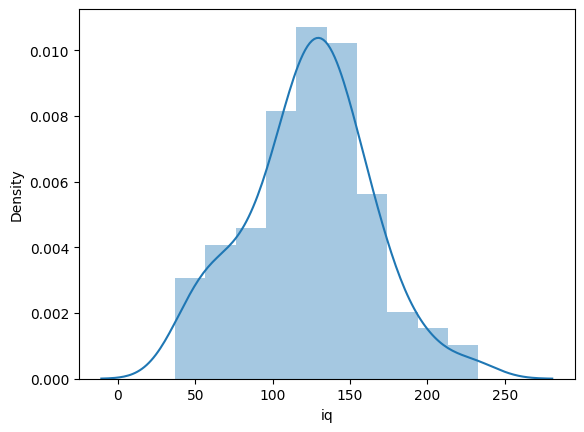

In [34]:
sns.distplot(df["iq"])

<Axes: xlabel='iq'>

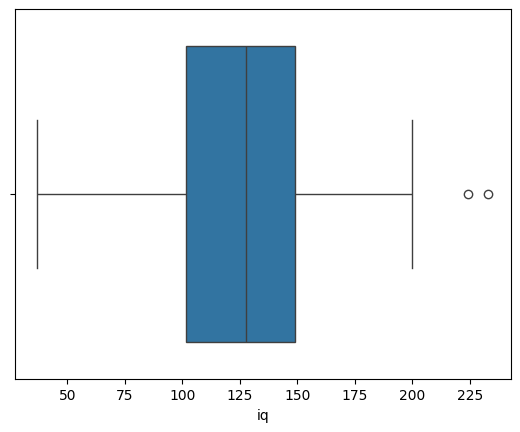

In [35]:
sns.boxplot(x="iq",data=df)

<Axes: ylabel='iq'>

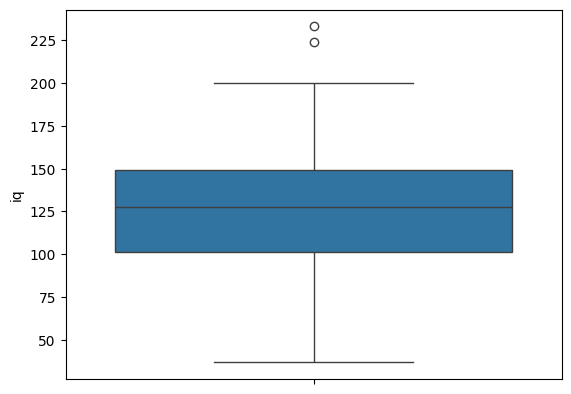

In [36]:
sns.boxplot(y="iq",data=df)


In [38]:
q1 = df["iq"].quantile(0.25)
q3 = df["iq"].quantile(0.75)


In [41]:
IQR = q3-q1

In [43]:
upper=q3+1.5*(IQR)
lower=q3-1.5*(IQR)


In [57]:
df[upper<df["iq"]]


,Unnamed: 0,cgpa,iq,placement
16,16,5.2,224.0,0
50,50,3.5,233.0,0


In [50]:
df[lower>df["iq"]]

,Unnamed: 0,cgpa,iq,placement
5,5,7.1,48.0,1
7,7,5.0,63.0,0
9,9,5.1,66.0,0
10,10,6.0,45.0,1
44,44,7.5,61.0,1
45,45,6.0,66.0,1
56,56,6.1,65.0,0
64,64,7.0,64.0,1
68,68,4.0,75.0,0
73,73,4.9,61.0,0


In [54]:
# capping:

import numpy as np

In [55]:
cap = df.copy()

In [56]:
cap["iq"] = np.where(cap["iq"]>upper,upper,np.where(cap["iq"]<lower,lower,cap["iq"]))

In [58]:
cap[upper<cap["iq"]]

,Unnamed: 0,cgpa,iq,placement


In [59]:
cap


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.00,1
1,1,5.9,106.00,0
2,2,5.3,121.00,0
3,3,7.4,132.00,1
4,4,5.8,142.00,0
...,...,...,...,...
95,95,4.3,200.00,0
96,96,4.4,77.75,0
97,97,6.7,182.00,1
98,98,6.3,103.00,1
